# Load Wisconsin Breast Cancer Dataset
30 attributes or features
We will see how our manually computed metrics match the results obtained
from Scikit-Learn functions. 

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

%matplotlib inline

# load data
data = load_breast_cancer()
X = data.data
y = data.target
print(X.shape, data.feature_names)

(569, 30) ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# Classification Model Evaluation Metrics

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(398, 30) (171, 30)


In [4]:
# build a logistic regression model on our breast cancer dataset and look at the confusion matrix for the model
# predictions on the test dataset
from sklearn import linear_model
# train and build the model
logistic = linear_model.LogisticRegression()
logistic.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Confusion Matrix

In [5]:
# predict on test data and view confusion matrix
import model_evaluation_utils as meu

y_pred = logistic.predict(X_test)
meu.display_confusion_matrix(true_labels=y_test, predicted_labels=y_pred, classes=[0, 1])

TypeError: __new__() got an unexpected keyword argument 'labels'

## True Positive, False Positive, True Negative and False Negative

In [6]:
# The preceding output depicts the confusion matrix with necessary annotations
positive_class = 1
TP = 106
FP = 4
TN = 59
FN = 2

## Accuracy
It is defined as the overall proportion of correct predictions of the model

In [7]:
fw_acc = round(meu.metrics.accuracy_score(y_true=y_test, y_pred=y_pred), 5)
mc_acc = round((TP + TN) / (TP + TN + FP + FN), 5)
print('Framework Accuracy:', fw_acc)
print('Manually Computed Accuracy:', mc_acc)

Framework Accuracy: 0.97076
Manually Computed Accuracy: 0.96491


## Precision 
It is defined as the number of predictions made that are actually correct or relevant out of all the predictions based on the positive class

In [8]:
fw_prec = round(meu.metrics.precision_score(y_true=y_test, y_pred=y_pred), 5)
mc_prec = round((TP) / (TP + FP), 5)
print('Framework Precision:', fw_prec)
print('Manually Computed Precision:', mc_prec)

Framework Precision: 0.96396
Manually Computed Precision: 0.96364


## Recall (sensitivity, hit rate, coverage)
It is defined as the number of instances of the positive class that
were correctly predicted

In [9]:
fw_rec = round(meu.metrics.recall_score(y_true=y_test, y_pred=y_pred), 5)
mc_rec = round((TP) / (TP + FN), 5)
print('Framework Recall:', fw_rec)
print('Manually Computed Recall:', mc_rec)

Framework Recall: 0.99074
Manually Computed Recall: 0.98148


## F1-Score
The F1-score is the harmonic mean of precision and recall and helps us
optimize a classifier for balanced precision and recall performance

In [11]:
fw_f1 = round(meu.metrics.f1_score(y_true=y_test, y_pred=y_pred), 5)
mc_f1 = round((2*mc_prec*mc_rec) / (mc_prec+mc_rec), 5)
print('Framework F1-Score:', fw_f1)
print('Manually Computed F1-Score:', mc_f1)
# Thus, you can see how our manually computed metrics match the results obtained
# from Scikit-Learn functions. This should give you a good idea of how to evaluate
# classification models with these metrics

Framework F1-Score: 0.97717
Manually Computed F1-Score: 0.97248


## ROC Curve and AUC

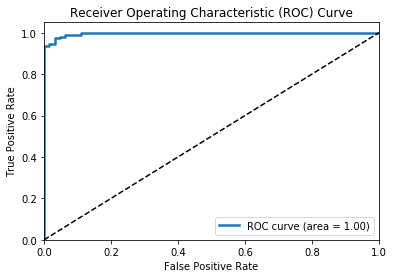

In [12]:
meu.plot_model_roc_curve(clf=logistic, features=X_test, true_labels=y_test)